# Assignment 4

Fundamentals of Machine Learning <br>
Master Data-Driven Design <br>
University of Applied Science Utrecht

## How a Decision Tree Works

A decison tree is a kind of flowchart: you start with one node and from there the node branches out to two nodes, that node branches out to two nodes, and so on. Each node is condition. When the condition is true, you continue to a branch on the left and when it is false you go to the right. Each node has an outcome, meaning the 'winning' class (or class with the highest frequency) at that point. The tree will keep branching out until one of the classes has a frequency of zero under all the previous conditions. 

## Data Pre-Processing

In [1]:
# importing stuff
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline

In [2]:
# loading data
data = pd.read_csv('Speed Dating Data.csv',  encoding = "ISO-8859-1")

In [3]:
# showing data
data.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Choice of Variables

When taking a close look at the documentation of this dataset, you can see that it is quite hard to find suitable variables. There are a lot of columns dedicated to data about the person, but rarelt any about their partner. Since the goal of this analysis is to find out what factors determine whether or not two people will form a match, we need data that reflect the connection between two people. In the current dataset there are three variables that represent the connection: correlation between participant’s and partner’s ratings of interests, same race and whether the two people have met before. Because we need five variables, we have to generate the other two.

The dataset consists of the ages of both people and the scores that they give eachother. Therefore, two variables that we can generate are the difference in age and the difference in rating that the two give each other. The rating from the partner to the person is an average over 6 factors, so we also need to calculate this score for the person to the partner.

In [4]:
# calculating the age difference
data['age_diff'] = abs(data['age'] - data['age_o'])

In [5]:
# calculating the average rate of 6 factors 
data['rate'] = (data['attr'] + data['sinc'] + data['intel'] + data['fun'] + data['amb'] + data['shar']) / 6
# calculating the rate difference
data['rate_diff'] = abs(data['rate'] - data['attr_o'])

This means we now have five variables that we can use:
* correlation between participant’s and partner’s ratings of interests (int_corr)
* same race (samerace)
* age difference (age_diff)
* met before (met)
* like difference (rate_diff)

In [6]:
data['rate'] = (data['attr'] + data['sinc'] + data['intel'] + data['fun'] + data['amb'] + data['shar']) / 6
data['rate_diff'] = abs(data['rate'] - data['attr_o'])

In [7]:
# removing data unnecessary to analysis
data = data[['int_corr', 'samerace', 'age_diff', 'met', 'rate_diff', 'match']]
# dropping all empty fields because otherwise the tree will protest
data = data.dropna()

In [8]:
# showing what the dataset looks like now
data.head()

,int_corr,samerace,age_diff,met,rate_diff,match
0,0.14,0,6.0,2.0,0.666667,0
1,0.54,0,1.0,1.0,0.166667,0
2,0.16,1,1.0,1.0,3.000000,1
3,0.61,0,2.0,2.0,0.000000,1
4,0.21,0,3.0,2.0,1.833333,1


In [9]:
# how many matches do we have? 1147
data['match'].value_counts()

0    5501
1    1147
Name: match, dtype: int64

In [10]:
# selecting x variables and y variable
x = data[['int_corr', 'samerace', 'age_diff', 'met', 'rate_diff']]
y = data['match']

## Splitting the Dataset

In [11]:
# splitting into test and trainingdata
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

## Training and Showing the Tree

In [12]:
# creating the tree
tree = DecisionTreeClassifier()
# fitting the tree with the training data
tree = tree.fit(x_train, y_train)

In [13]:
# visualize the tree
graph_data = export_graphviz(tree, 
                             out_file = None,
                             feature_names = x.columns.values,
                             filled = True, 
                             rounded = True,
                             class_names=['no match', 'match'])

graph = graphviz.Source(graph_data)
graph

In [14]:
# restrict the tree so we can oversee all branches
tree = DecisionTreeClassifier(max_depth = 2)
tree = tree.fit(x_train, y_train)

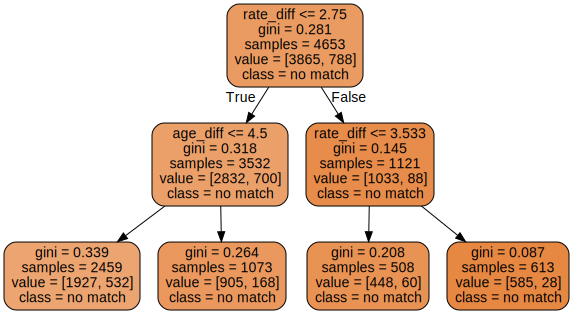

In [15]:
# visualize the tree
graph_data = export_graphviz(tree, 
                             out_file = None,
                             feature_names = x.columns.values,
                             filled = True, 
                             rounded = True,
                             class_names=['no match', 'match'])

graph = graphviz.Source(graph_data)
graph

As we can see in the decision tree above: it is not possible to find a match. From this we can conclude that either the speed dating company needs to work on their matchmaking or I need to work on my algorithm. I have a feeling that this outcome can be blamed on the variables that I chose. However, since the data was focused on the person and not on the relationship between the person and their partner, I could not have used better variables.

In [16]:
# expand the tree a bit more so we can get a match
tree = DecisionTreeClassifier(max_depth = 4)
tree = tree.fit(x_train, y_train)

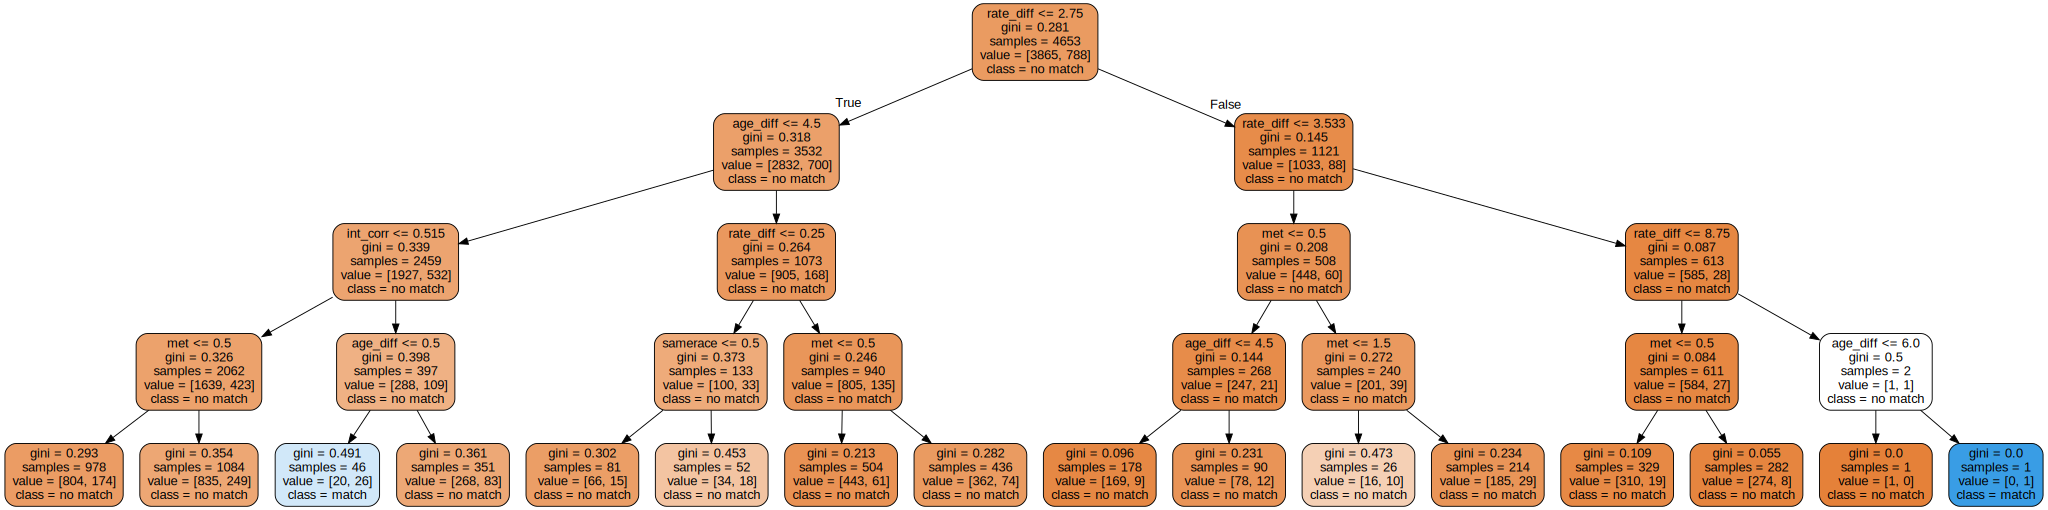

In [17]:
# visualize the tree
graph_data = export_graphviz(tree, 
                             out_file = None,
                             feature_names = x.columns.values,
                             filled = True, 
                             rounded = True,
                             class_names=['no match', 'match'])

graph = graphviz.Source(graph_data)
graph

From this tree we can see that there are two possibilities to get a match:
1. When the rate difference is smaller of equal to 2.75, the age diffence is smaller of equal to 4.5, the correlation between interests is higher or than 0.515 and the age difference is smaller or equal to 0.5. In this case there are 6 matches more than no matches. The gini coefficient is quite higher for this node, which means this node is impure.
2. When the rate difference is higher than 2.75, the rate difference is higher than 3.533, the rate difference is also higher than 8.75 but the rate difference is smaller or equal to 9.083. In this case there is only one match more than no match. The gini coefficient is zero for this node, which means it is pure.

## Evaluating the Tree

In [18]:
# back to the big tree
tree = DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)

In [19]:
# making predictions with our tree
y_pred = tree.predict(x_test)

In [20]:
# let's see how well our tree does
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['no match', 'match'], columns = ['predicted no', 'predicted yes']) 
confusion_matrix

,predicted no,predicted yes
no match,1373,263
match,241,118


In [21]:
# calculating precision
print('precision: ' + str(1373 / (1373 + 263)))

precision: 0.839242053789731


In [22]:
# calculating recall
print('recall: ' + str(1373 / (1373 + 239)))

recall: 0.8517369727047146


In [23]:
# calculating accuracy
print('accuracy: ' + str((1373 + 120) / 1995))

accuracy: 0.7483709273182957


In the confusion matric above you can see that our model misclassified (239 + 263 =) 502 instances and correctly classified (1373 + 120 =) 1493 instances. This gives us a precision (what proportion of positive identifications was actually correct?) of 83.9%, a recall (what proportion of actual positives was identified correctly?) of 85.2% and an accuracy of 74.8%.